<a href="https://colab.research.google.com/github/BhaskarFysik/AlgoShared/blob/main/oi_analysis_option_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import pandas as pd
import time
import datetime


sesi=requests.Session()
headers={}
headers['user-agent']='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'
a=sesi.get("https://www.nseindia.com/",headers=headers)

indices = ['BANKNIFTY','FINNIFTY','NIFTY']

def FetchOptionChainfromNSE (scrip):
    
    if scrip in indices:
        url=f"https://www.nseindia.com/api/option-chain-indices?symbol={scrip}"
    else:
        symbol4NSE = scrip.replace('&', '%26')
        url=f"https://www.nseindia.com/api/option-chain-equities?symbol={symbol4NSE}"
    
    a=sesi.get(url,headers=headers)
    return a.json()['records']
    
def GetOptionChain(name, expiry):
    option_chain = pd.DataFrame()
    option_chain_record = FetchOptionChainfromNSE (name)

    #print("Market price of",name,"=",option_chain_record['underlyingValue'])
    
    option_chain_data = option_chain_record['data']
    option_chain_data_df = pd.DataFrame(option_chain_data)
    option_chain_data_df  = option_chain_data_df[(option_chain_data_df.expiryDate == expiry) ]

    OptionChain_CE = pd.DataFrame()
    OptionChain_CE['CE'] = option_chain_data_df['CE']
    
    OptionChain_CE_expand = pd.concat([OptionChain_CE.drop(['CE'], axis=1), OptionChain_CE['CE'].apply(pd.Series)], axis=1)

    OptionChain_PE = pd.DataFrame()
    OptionChain_PE['PE'] = option_chain_data_df['PE']
    OptionChain_PE_expand = pd.concat([OptionChain_PE.drop(['PE'], axis=1), OptionChain_PE['PE'].apply(pd.Series)], axis=1)
    
    option_chain['CE_OI'] =  OptionChain_CE_expand['openInterest']
    option_chain['CE_CHNG_IN_OI'] =  OptionChain_CE_expand['changeinOpenInterest']
    option_chain['CE_VOLUME'] =  OptionChain_CE_expand['totalTradedVolume']
    option_chain['CE_IV'] =  OptionChain_CE_expand['impliedVolatility']
    option_chain['CE_LTP'] =  OptionChain_CE_expand['lastPrice']
    option_chain['CE_CHNG'] =  OptionChain_CE_expand['change']
    option_chain['CE_BID_QTY'] =  OptionChain_CE_expand['bidQty']
    option_chain['CE_BID_PRICE'] =  OptionChain_CE_expand['bidprice']
    option_chain['CE_ASK_PRICE'] =  OptionChain_CE_expand['askPrice']
    option_chain['CE_ASK_QTY'] =  OptionChain_CE_expand['askQty']
    
    option_chain['strikePrice'] =  option_chain_data_df['strikePrice']
    
    option_chain['PE_BID_QTY'] =  OptionChain_PE_expand['bidQty']
    option_chain['PE_BID_PRICE'] =  OptionChain_PE_expand['bidprice']
    option_chain['PE_ASK_PRICE'] =  OptionChain_PE_expand['askPrice']
    option_chain['PE_ASK_QTY'] =  OptionChain_PE_expand['askQty']
    option_chain['PE_CHNG'] =  OptionChain_PE_expand['change']
    option_chain['PE_LTP'] =  OptionChain_PE_expand['lastPrice']
    option_chain['PE_IV'] =  OptionChain_PE_expand['impliedVolatility']
    option_chain['PE_VOLUME'] =  OptionChain_PE_expand['totalTradedVolume']
    option_chain['PE_CHNG_IN_OI'] =  OptionChain_PE_expand['changeinOpenInterest']
    option_chain['PE_OI'] =  OptionChain_PE_expand['openInterest']
    
    return option_chain
    

scripname = 'NIFTY'
ExpiryDate = '10-Nov-2022'
def main():
    #return(GetOptionChain(scripname, ExpiryDate))
    Option_chain = GetOptionChain(scripname, ExpiryDate)
    print(Option_chain)
    #Option_chain.to_csv(scripname + ".csv", index=False)
    
main()
#live option chain
"""while True:
  main()
  time.sleep(10)"""

#total oi & pcr
"""while True:
    
    Option_chain = GetOptionChain(scripname, ExpiryDate)
    ce_oi_sum=Option_chain['CE_OI'].sum()
    pe_oi_sum = Option_chain['PE_OI'].sum()
    pcr=(pe_oi_sum/ce_oi_sum)
    pcr=round(pcr,4)
    ce_oi_sum=str(ce_oi_sum)
    pe_oi_sum=str(pe_oi_sum)
    pcr=str(pcr)
    date_time=datetime.datetime.now()
    current_time=date_time.strftime("%H:%M:%S")
    print(current_time, "Total-CE-OI="+ce_oi_sum,   "Total-PE-OI="+pe_oi_sum,   "PCR="+pcr)
    #Option_chain.to_csv(scripname + ".csv", index=False)
    time.sleep(10) """

      CE_OI  CE_CHNG_IN_OI  CE_VOLUME  CE_IV  CE_LTP  CE_CHNG  CE_BID_QTY  \
112       0              0          0   0.00     0.0     0.00        1500   
120       0              0          0   0.00     0.0     0.00        1500   
125       0              0          0   0.00     0.0     0.00        1500   
129       0              0          0   0.00     0.0     0.00        1500   
152       0              0          0   0.00     0.0     0.00        1500   
...     ...            ...        ...    ...     ...      ...         ...   
1037    725            679       1973  24.73     0.7    -0.40         500   
1051   3197           1081       3287  25.74     0.8    -0.40        5400   
1060    570            357       1526  26.04     0.7    -0.45        2400   
1069  11836           2753       9237  27.06     0.8    -0.25        4450   
1071   9646           1526       3258  27.72     0.8    -0.30        4600   

      CE_BID_PRICE  CE_ASK_PRICE  CE_ASK_QTY  ...  PE_BID_QTY  PE_BID_PRICE

'while True:\n    \n    Option_chain = GetOptionChain(scripname, ExpiryDate)\n    ce_oi_sum=Option_chain[\'CE_OI\'].sum()\n    pe_oi_sum = Option_chain[\'PE_OI\'].sum()\n    pcr=(pe_oi_sum/ce_oi_sum)\n    pcr=round(pcr,4)\n    ce_oi_sum=str(ce_oi_sum)\n    pe_oi_sum=str(pe_oi_sum)\n    pcr=str(pcr)\n    date_time=datetime.datetime.now()\n    current_time=date_time.strftime("%H:%M:%S")\n    print(current_time, "Total-CE-OI="+ce_oi_sum,   "Total-PE-OI="+pe_oi_sum,   "PCR="+pcr)\n    #Option_chain.to_csv(scripname + ".csv", index=False)\n    time.sleep(10) '

In [ ]:
while True:
  Option_chain = GetOptionChain(scripname, ExpiryDate)
  option_chain_record = FetchOptionChainfromNSE (scripname)
  print(option_chain_record['underlyingValue'])
  print(Option_chain.CE_IV)
  break

18117.15
112      0.00
120      0.00
125      0.00
129      0.00
152      0.00
        ...  
1037    24.73
1051    25.74
1060    26.04
1069    27.06
1071    27.72
Name: CE_IV, Length: 104, dtype: float64


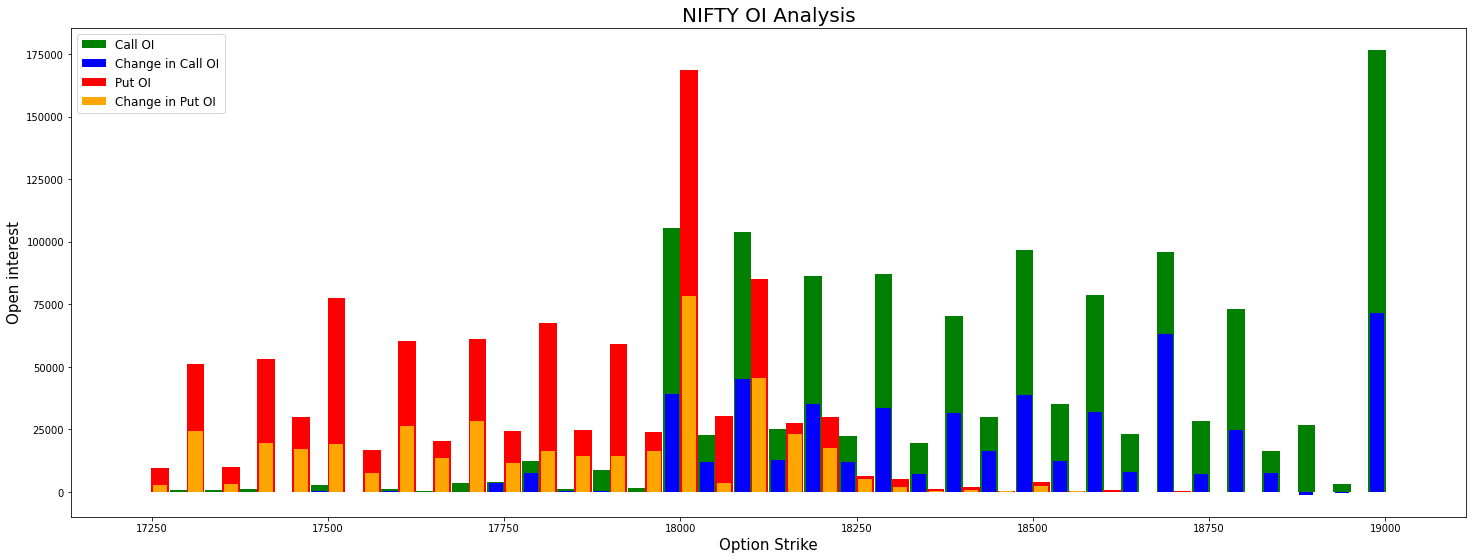

In [ ]:
from matplotlib import pyplot as plt
while True:
  df= GetOptionChain(scripname, ExpiryDate)
  option_chain_record = FetchOptionChainfromNSE (scripname)
  index_price=option_chain_record['underlyingValue']
  #print(df)
  new_df=df.loc[df['strikePrice']>index_price*0.95]
  Option_chain=new_df.loc[new_df['strikePrice']<index_price*1.05]
  call_iv=Option_chain.CE_IV
  put_iv=Option_chain.PE_IV
  strike_price=Option_chain.strikePrice
  call_ltp=Option_chain.CE_LTP
  put_ltp=Option_chain.PE_LTP
  call_oi=Option_chain.CE_OI
  put_oi=Option_chain.PE_OI
  change_ce_oi=Option_chain.CE_CHNG_IN_OI
  change_pe_oi=Option_chain.PE_CHNG_IN_OI
  #print(change_pe_oi)
  #plt.plot(strike_price,call_iv)
  #plt.plot(strike_price,put_iv)
  #plt.scatter(strike_price,call_ltp)
  #plt.scatter(strike_price,put_ltp)
  plt.figure(figsize=(25,9))
  plt.bar(strike_price-12,call_oi,width=25.0,color='green')
  plt.bar(strike_price-12,change_ce_oi,width=20.0,color='blue')
  plt.bar(strike_price+12,put_oi,width=25.0,color='red')
  plt.bar(strike_price+12,change_pe_oi,width=20.0,color='orange')
  plt.xlabel('Option Strike',fontsize = 15)
  plt.ylabel('Open interest',fontsize = 15)
  plt.title(scripname+' OI Analysis',fontsize = 20)
  plt.legend(['Call OI','Change in Call OI','Put OI','Change in Put OI'],fontsize=12)
  plt.show
  break

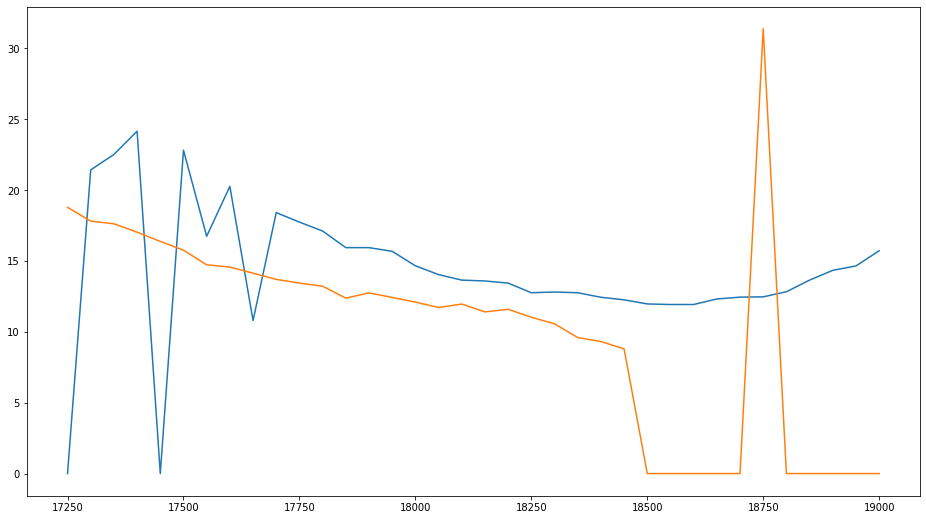

In [ ]:
from matplotlib import pyplot as plt
while True:
  df= GetOptionChain(scripname, ExpiryDate)
  option_chain_record = FetchOptionChainfromNSE (scripname)
  index_price=option_chain_record['underlyingValue']
  #print(df)
  new_df=df.loc[df['strikePrice']>index_price*0.95]
  Option_chain=new_df.loc[new_df['strikePrice']<index_price*1.05]
  call_iv=Option_chain.CE_IV
  put_iv=Option_chain.PE_IV
  strike_price=Option_chain.strikePrice
  call_ltp=Option_chain.CE_LTP
  put_ltp=Option_chain.PE_LTP
  call_oi=Option_chain.CE_OI
  put_oi=Option_chain.PE_OI
  change_ce_oi=Option_chain.CE_CHNG_IN_OI
  change_pe_oi=Option_chain.PE_CHNG_IN_OI
  #print(change_pe_oi)
  plt.figure(figsize=(16,9))
  plt.plot(strike_price,call_iv)
  plt.plot(strike_price,put_iv)
  #plt.scatter(strike_price,call_ltp)
  #plt.scatter(strike_price,put_ltp)
  plt.show
  break